<a href="https://colab.research.google.com/github/andrewcampos1/Proyectos-de-IA/blob/main/TPF_IA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_fd = pd.read_csv('/content/drive/MyDrive/full_data.csv')
 #df=pd.read_csv("C:/Users/inu/Documents/ia/trabajo practico 1/dataset/weather.csv")
sns.set_style('darkgrid')
df_fd.head(100)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
95,Male,71.0,1,1,No,Govt_job,Rural,216.94,30.9,never smoked,1
96,Male,61.0,1,0,Yes,Self-employed,Rural,76.11,27.3,smokes,1
97,Male,74.0,0,0,Yes,Private,Urban,72.96,31.3,smokes,1
98,Female,38.0,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1


### Curacion de datos

In [ ]:

df_copy = df_fd.copy()

# reemplaza las columnas smoking status, residence type, work type por variables dummys binarias

df_copy = pd.get_dummies(df_fd, columns=['smoking_status', 'work_type'])


# de la columna "ever_married" se reemplazan los valores "Yes" por 1 y "No" por 0
df_copy['ever_married'] = df_copy['ever_married'].replace(['Yes'], 1)
df_copy['ever_married'] = df_copy['ever_married'].replace(['No'], 0)

# de la columna "gender" del dataframe df_fd, reemplaza Male por 1 y Female por 0
df_copy['gender'] = df_copy['gender'].replace(['Male'], 1)
df_copy['gender'] = df_copy['gender'].replace(['Female'], 0)

# de la columna "residence type" se reemplazan los valores "urban" por 1 y "rural" por 0

df_copy['Residence_type'] = df_copy['Residence_type'].replace(['Urban'], 1)
df_copy['Residence_type'] = df_copy['Residence_type'].replace(['Rural'], 0)


df_copy.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,1,0,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,1,0,0
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


In [ ]:
df_fd.isnull().values.any()

#corroboramos que el dataset no tenga datos con valores null

False

Para la parte de la curacion de datos, se reemplazaron las variables categoricas por variables dummy para poder meterlos en el modelo de regresion.
No se encontraron valores null ni se considero necesario eliminar valores.

### Graficos



In [ ]:
#sns.pairplot(df_fd, palette = "Spectral")

# grafica bmi vs age

#sns.scatterplot(x = df_fd['age'], y = df_fd['bmi'], hue = df_fd['stroke'])


#plt.show()

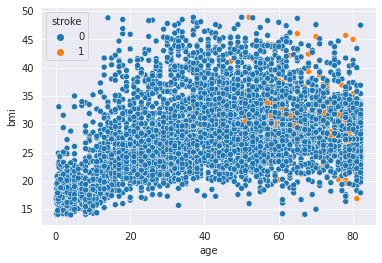

In [ ]:
#grafica bmi vs avg_glucose_level

sns.scatterplot(x = df_fd['age'], y = df_fd['bmi'], hue = df_fd['stroke'])


En este primer grafico se puede ver la edad vs bmi. Se puede ver que a medida que la persona tiene mas edad, tiene a tener mas bmi. Ademas, se puede ver como los strokes se acumulan con mas frecuencia en las personas con mas edad y bmi.

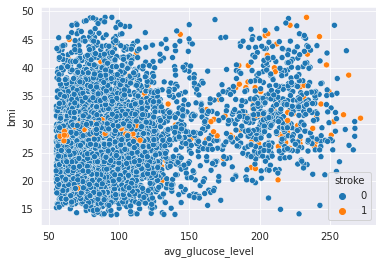

In [ ]:
# grafica avg_glucose_level vs bmi

sns.scatterplot(x = df_fd['avg_glucose_level'], y = df_fd['bmi'], hue = df_fd['stroke'])


En este grafico se ve como la mayoria de los puntos con stroke se concentran a la derecha. Osea, a mas bmi y glucosa promedio, se ve que se acumulan mas stroke.

### Regresion lineal multiple

In [ ]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr


X_multiple = df_copy[['stroke', 'bmi', 'hypertension', 'heart_disease', 'avg_glucose_level',
'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'smoking_status_Unknown',
'Residence_type', 'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'ever_married']]

# X_multiple = df_copy[['bmi', 'ever_married', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke']]

Y_multiple = df_copy['age']

X_train, X_test, Y_train, Y_test = train_test_split(X_multiple, Y_multiple, test_size = 0.2, random_state = 42)
regresion_multiple = linear_model.LinearRegression()
regresion_multiple.fit(X_train,Y_train)

coef_regresion = regresion_multiple.coef_
intecept_y = regresion_multiple.intercept_

print("Las pendiente de las rectas son",coef_regresion, "y la interseccion es",intecept_y )

predict = regresion_multiple.predict(X_test)
mean_squared_error(Y_test, predict)

score = regresion_multiple.score(X_test, Y_test)

print("El score de la regresion lineal múltiple es: ", score)

# usa el modelo calculado para predecir la edad de una persona con los siguientes datos:
# bmi = 30, ever_married = 1, hypertension = 1, heart_disease = 0, avg_glucose_level = 100, stroke = 0

#simulo una prediccion con los valores de la primera fila del X_test y la edad correspondiente a esos valores en Y_test
predict = regresion_multiple.predict([[0.0, 26.9, 1.0, 0.0, 180.76, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]])
print("La edad predicha es de",str(int(predict)), "la edad real es de ", int(np.array(Y_test)[0]) )


Las pendiente de las rectas son [ 12.42000775  -0.03336065   8.38967711  13.49298659   0.04122721
   3.06523358  -0.23402113  -2.06301886  -0.7681936    0.42256835
   5.20284845   2.19028239  12.81173512 -20.20486596  18.51186858] y la interseccion es 24.337291199060054
El score de la regresion lineal múltiple es:  0.6543615423769751
La edad predicha es de 59 la edad real es de  65


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Primeramente, se cambiaron todas las variables de tipo categoricas por variables dummy. De esta forma, es posible incluirlas en el analisis hecho con la regresion lineal multiple.

En este caso, se incluyeron todos los atributos disponibles menos el **genero**, que lo consideramos irrelevante para nuestra variable target que es la **edad**. Encontramos que nuestro modelo tiene un score de 0.65.

Se le pide al modelo que prediga la edad de una persona dandole ciertos valores inventados, y el modelo predice que tiene 59 años, cuando la persona tiene 65.

### TP1 PARTE 2

In [ ]:
inputs = df_copy.drop(columns=['stroke']) #saco la columna target de los parametros que va a usar mi modelo
target = np.array(df_fd['stroke'])
inputs = np.array(inputs)
train_inputs, test_inputs, train_target, test_target= train_test_split(inputs, target, test_size= 0.2, random_state=42)


min_max_scaler = preprocessing.MinMaxScaler()
inputs_train_minmax = min_max_scaler.fit_transform(train_inputs)
inputs_test_minmax = min_max_scaler.fit_transform(test_inputs)
inputs_minmax = min_max_scaler.fit_transform(inputs)
# al escalar los valores de nuestros datos se los transforma para que esten dentro de un rango de [0,1]. Por ejemplo, un valor de bmi sin escalar de 26 luego de ser escalado pasa
# a ser de 0.31640625 lo cual es una buena práctica ya que según el tipo de modelo no escalar los datos puede afectar al funcionamiento
# es importante destacar que no escalamos el target, ya que stroke ya toma valores entre 0 y 1, por lo que sería irrelevante normalizar

reglog = LogisticRegression( class_weight = 'balanced' ) # balancea los pesos de las clases ya que tenemos demasiadas filas donde stroke = 0 y pocas a comparacion donde stroke = 1
reglog.fit(inputs_train_minmax, train_target) #entrenamos el modelo


pred = reglog.predict(inputs_test_minmax) #testeamos el modelo entrenado

print("El accuracy es de", accuracy_score(test_target, pred))
print("El recall es de", recall_score(test_target, pred))




El accuracy es de 0.7352056168505516
El recall es de 0.8333333333333334


[[688 255]
 [  9  45]]


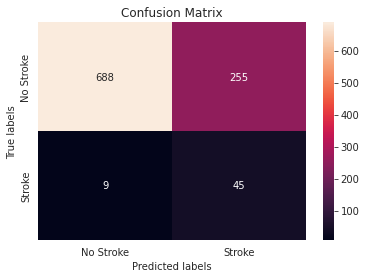

In [ ]:
cm = confusion_matrix(test_target, pred)
print(cm)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Stroke', 'Stroke']); ax.yaxis.set_ticklabels(['No Stroke', 'Stroke']);

Inicialmente, se encontro que nuestro modelo tiene un score del 94%. Los resultados de la matriz de confusion para este caso fueron:

- 943 negativos verdaderos
- 0 falsos negativos
- 54 falsos positivos
- 0 positivos verdaderos

Lo que muestra, que nuestro modelo esta prediciendo siempre que la persona no tuvo un *stroke*, y esta teniendo un 94% de precision. Nuestro modelo no esta prediciendo nunca un positivo, y esto es porque la carga, o el peso de los datos esta **desbalanceado**. En nuestra base de datos, la cantidad de personas que **si** tienen un stroke son muy pocas en comparacion contra las que **no** tienen un stroke, por lo que el modelo aprende a siempre predecir un no, y con ello tiene una precision altisima. Para arreglar esto, decidimos balancear la carga de los datos, para que el 50% de los casos tomados sean un positivo en stroke, y el otro 50% sea negativo en stroke.

Para esta ejecucion, se puede observar un score del 73%, y para la matriz de confusion se puede observar:

- 688 negativos verdaderos
- 255 falsos negativos
- 9 falsos positivos
- 45 positivos verdaderos

Mejorando significativamente el modelo.



In [ ]:
print(cr(test_target, pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       943
           1       0.15      0.83      0.25        54

    accuracy                           0.74       997
   macro avg       0.57      0.78      0.55       997
weighted avg       0.94      0.74      0.81       997



Para entender estas métricas, cabe recordar que:
- PRECISION: es el ratio entre los verdaderos positivos respecto al numero total de predicciones positivas
verdaderos positivos / (verdaderos positivos + falsos positivos)
- RECALL: es el ratio entre verdaderos positivos predichos respecto al número total de positivos del dataset
verdaderos positivos / (verdaderos positivos + falsos negativos)

Generalmente es necesario elegir al modelar entre una buena precision o un buen recall, para este proyecto en particular, es prioritario tener un buen recall ya que esto indicaría que no se nos pasen por altos casos de stroke sin predecir, lo que sería peligroso.

### Parte 3. SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='linear',C=1, random_state = 42, class_weight = 'balanced')
svm.fit(inputs_train_minmax, train_target)  #los target no es necesario escalarlos porque en este caso es "stroke" con valores 1 o 0, escalarlos no cambiaría nada
                                            #entrenamos nuestro modelo de Vector Soporte

pred = svm.predict(inputs_test_minmax)  #ponemos a prueba con la parte del dataset que separamos para test

print("El accuracy es de", accuracy_score(test_target, pred))
print("El recall es de", recall_score(test_target, pred))

El accuracy es de 0.7101303911735206
El recall es de 0.8333333333333334


Usando el kernel para el modelo SVM de "linear" en lugar de "poly" obtenemos un accuracy levemente mas bajo, pero observando la matriz de confusion vemos que la mejora sería relevante en cuanto a predicciones ya que mejora el recall, ya que disminuye notablemente (de 24 a 9) la cantidad de casos en los que la persona SI tuvo un stroke pero el modelo predijo que NO iba a tener un stroke, lo que teniendo en cuenta el objetivo del modelo sería peligroso ya que estaríamos dando por hecho que una persona no tendrá ese riesgo cuando sí lo va a tener.


[[663 280]
 [  9  45]]


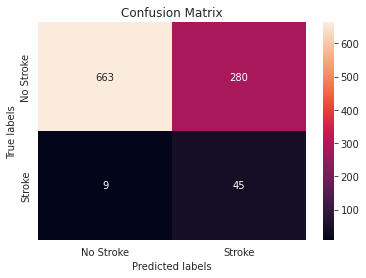

In [ ]:
cm = confusion_matrix(test_target, pred)
print(cm)

# grafica de la matriz de confusion

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Stroke', 'Stroke']); ax.yaxis.set_ticklabels(['No Stroke', 'Stroke']);




In [ ]:
print(cr(test_target, pred))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       943
           1       0.14      0.83      0.24        54

    accuracy                           0.71       997
   macro avg       0.56      0.77      0.53       997
weighted avg       0.94      0.71      0.79       997



In [ ]:
# hace la validacion cruzada del modelo SVM con 10 folds

scores = cross_val_score(svm, inputs_minmax, target, cv=10)
print('Scores de cada fold de las 10 que se realizan en la validación cruzada:')
print(scores)
print('Score promedio:')
print(np.mean(scores))


Scores de cada fold de las 10 que se realizan en la validación cruzada:
[0.71943888 0.72891566 0.70682731 0.74096386 0.68674699 0.72289157
 0.72289157 0.76706827 0.71686747 0.69477912]
Score promedio:
0.7207390684984426


In [ ]:
# prueba automaticamente los hiperparametros del modelo con los valores que nosotros precargamos arbitrariamente a la grilla
# si bien los valores los cargamos nosotros, es un acercamiento leve al metalearning

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10],
                'gamma': [1, 0.1, 0.01],
                'kernel': ['linear', 'poly']}
grid = GridSearchCV(SVC(random_state = 42, class_weight = 'balanced'), param_grid, refit=True, verbose=2)
grid.fit(inputs_train_minmax, train_target)

# el programa prueba todas las combinaciones posibles de los valores cargados en la grilla en nuestro modelo y finalmente nos entrega cual fue según la interpretacion del método los que considera
# como la mejor combinacion de hiperparámetros dentro de los brindados

print(" Resultados de la Grid Search " )
print("\n El mejor estimador entre todos los hiperparámetros buscados:\n",grid.best_estimator_)
print("\n El mejor score entre todos los hiperparámetros buscados:\n",grid.best_score_)
print("\n Los mejores hiperparámetros entre todos los hiperparámetros buscados:\n",grid.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, k

Obtenemos como resultado de la búsqueda en grilla los siguientes resultados:


*   El mejor estimador entre todos los hiperparámetros buscados:
 SVC(C=0.1, class_weight='balanced', gamma=0.01, kernel='poly', random_state=42)
*   El mejor score entre todos los hiperparámetros buscados:
 0.9513054608046506
*   Los mejores hiperparámetros entre todos los hiperparámetros buscados:
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}

 Con estos resultados, repetimos el proceso realizado al inicio de la parte 3 para modelar con los nuevos hiperparámetros y corroborar que efectivamente se obtienen los resultados que indica la búsqueda en grilla, es decir, un accuracy de 0.95 y vemos la matriz de confusión asociada para corroborar las predicciones que devuelve el modelo.






El accuracy es de 0.7101303911735206
El recall es de 0.8333333333333334
[[  0 943]
 [  0  54]]


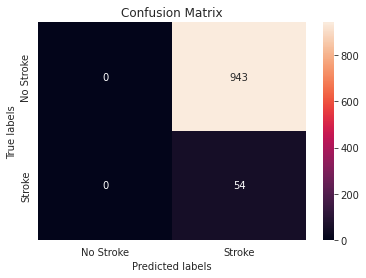

In [ ]:
svm_new =  SVC(C=0.1, class_weight='balanced', gamma=0.01, kernel='poly', random_state=42)
svm_new.fit(inputs_train_minmax, train_target)
pred_new = svm_new.predict(inputs_test_minmax)

print("El accuracy es de", accuracy_score(test_target, pred))
print("El recall es de", recall_score(test_target, pred))

cm_new = confusion_matrix(test_target, pred_new)
print(cm_new)

#si bien la grilla considera que esos fueron los mejores hiperparámetros, podemos ver que en realidad el resultado no es tan bueno ya que el modelo construido de esta forma
#no brinda una buena respuesta, siempre da la misma respuesta y es que la persona SI tendrá un stroke
ax = plt.subplot()
sns.heatmap(cm_new, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Stroke', 'Stroke']); ax.yaxis.set_ticklabels(['No Stroke', 'Stroke']);

Al graficar podemos ver que con los parámetros que nos devolvió la grilla el modelo es inútil, ya que se inclina completamente a categorizar todos en el mismo grupo y no cumple su funcion

### Parte 4. Árboles de decisión y Random Forest

[[42  8]
 [ 9 41]]


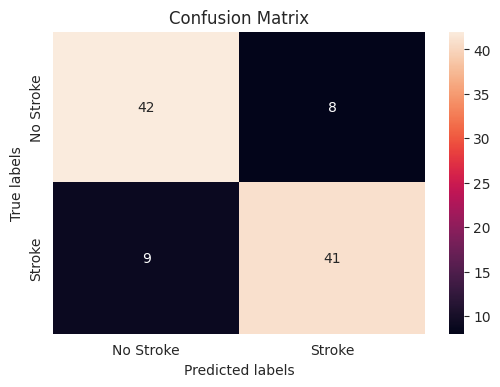

In [ ]:
from sklearn impot tree
from imblearn.under_sampling import RandomUnderSampler

inputs = df_copy.drop(columns=['stroke']) #saco la columna target de los parametros que va a usar mi modelo
target = np.array(df_fd['stroke'])
inputs_np = np.array(inputs)

# en estas 3 lineas siguientes lo que hacemos es igualar la cantidad de filas del dataset donde Stroke = 1 con la cantidad de filas del dataset donde Stroke = 0.
# se llama undersample porque descartamos filas para poder balancear el modelo ya que sino tiende a predecir que la persona no tendrá un stroke debido al sesgo que genera la desproporcion de datos

undersample = RandomUnderSampler(sampling_strategy='majority')
inputs_under, targets_under = undersample.fit_resample(inputs_np, target)
train_inputs, test_inputs, train_target, test_target= train_test_split(inputs_under, targets_under, test_size= 0.2, random_state=42)

Tree = tree.DecisionTreeClassifier(max_depth= 3).fit(train_inputs, train_target)
pred = Tree.predict(test_inputs)

cm = confusion_matrix(test_target, pred)
print(cm)

# grafica de la matriz de confusion
plt.rcParams["figure.dpi"] = 100
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Stroke', 'Stroke']); ax.yaxis.set_ticklabels(['No Stroke', 'Stroke']);

In [ ]:
print("El accuracy con undersample es de", accuracy_score(test_target, pred))
print("El recall con undersample es de", recall_score(test_target, pred))

El accuracy con undersample es de 0.83
El recall con undersample es de 0.82


Para comparar, a continuacion se muestra lo que sucede si no realizamos el undersample que balancea los datos con los que trabajamos el modelo

[[643 300]
 [ 10  44]]
El accuracy sin undersample es de 0.6890672016048145
El recall sin undersample es de 0.8148148148148148


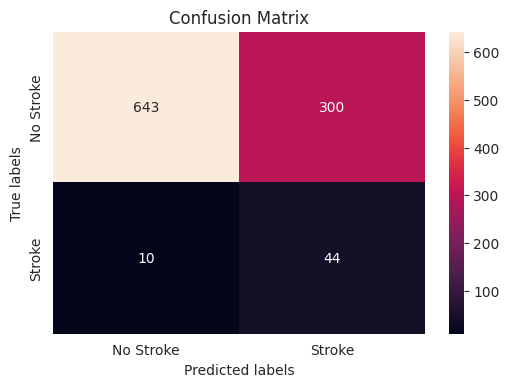

In [ ]:
train_inputs, test_inputs, train_target, test_target= train_test_split(inputs, target, test_size= 0.2, random_state=42)

# en este caso, en lugar de balancear con un undersampled balanceamos con un hiperparametro que nos permite configurar el modelo, pero el resultado no es tan bueno
Tree_nounder = tree.DecisionTreeClassifier(max_depth= 3, class_weight= 'balanced').fit(train_inputs, train_target)
pred = Tree_nounder.predict(test_inputs)

cm = confusion_matrix(test_target, pred)
print(cm)

# grafica de la matriz de confusion
plt.rcParams["figure.dpi"] = 100
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Stroke', 'Stroke']); ax.yaxis.set_ticklabels(['No Stroke', 'Stroke']);

print("El accuracy sin undersample es de", accuracy_score(test_target, pred))
print("El recall sin undersample es de", recall_score(test_target, pred))

In [ ]:
from sklearn.tree import plot_tree

inputs_list = list(inputs)

plt.rcParams["figure.dpi"] = 400
plt.figure(figsize=(30,20))
plot_tree(Tree, filled=True,feature_names= inputs_list)
plt.savefig('arbol.png')
plt.show()

Podemos ver la importancia de cada parámetro en el árbol de decision, podemos observar que hay muchas variables que no intervienen o lo hacen con muy poco peso, y que por mucha diferencia la principal razón de clasificación es la edad

In [ ]:
importances = list(Tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(inputs_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: age                  Importance: 0.89
Variable: bmi                  Importance: 0.06
Variable: smoking_status_never smoked Importance: 0.04
Variable: avg_glucose_level    Importance: 0.01
Variable: gender               Importance: 0.0
Variable: hypertension         Importance: 0.0
Variable: heart_disease        Importance: 0.0
Variable: ever_married         Importance: 0.0
Variable: Residence_type       Importance: 0.0
Variable: smoking_status_Unknown Importance: 0.0
Variable: smoking_status_formerly smoked Importance: 0.0
Variable: smoking_status_smokes Importance: 0.0
Variable: work_type_Govt_job   Importance: 0.0
Variable: work_type_Private    Importance: 0.0
Variable: work_type_Self-employed Importance: 0.0
Variable: work_type_children   Importance: 0.0


Realizamos una búsqueda por grilla para buscar la mejor forma de construir el modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

# como vimos, el modelado en este caso funciona mejor haciendo undersample con el dataset, por lo que nuevamente trabajaremos de esta forma
undersample = RandomUnderSampler(sampling_strategy='majority')
inputs_under, targets_under = undersample.fit_resample(inputs_np, target)
train_inputs, test_inputs, train_target, test_target= train_test_split(inputs_under, targets_under, test_size= 0.2, random_state=42)

param_grid = {'max_depth': [4, 5, 10],
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'min_samples_leaf': [2, 10, 20]}
grid = GridSearchCV(tree.DecisionTreeClassifier(random_state= 42, class_weight = 'balanced'), param_grid, refit=True, verbose=2)
grid.fit(train_inputs, train_target)
print(" Resultados de la Grid Search " )
print("\n El mejor estimador entre todos los hiperparámetros buscados:\n",grid.best_estimator_)
print("\n El mejor score entre todos los hiperparámetros buscados:\n",grid.best_score_)
print("\n Los mejores hiperparámetros entre todos los hiperparámetros buscados:\n",grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV] END

Resultados de la Grid Search

 El mejor estimador entre todos los hiperparámetros buscados:
 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, random_state=42)

 El mejor score entre todos los hiperparámetros buscados:
 0.8190220235430605

 Los mejores hiperparámetros entre todos los hiperparámetros buscados:
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'splitter': 'best'}

[[44  6]
 [15 35]]
El accuracy del modelo determinado por la Grid Search es:  0.79
El recall del modelo determinado por la Grid Search es de 0.7


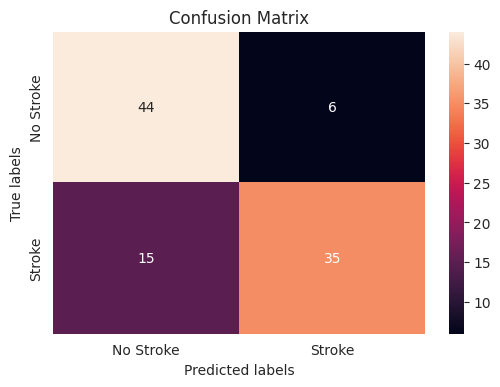

In [ ]:
Tree = tree.DecisionTreeClassifier(random_state= 42, max_depth=6,
                       min_samples_leaf=2, splitter='best', criterion='gini').fit(train_inputs, train_target)
pred = Tree.predict(test_inputs)

cm = confusion_matrix(test_target, pred)
print(cm)
print('El accuracy del modelo determinado por la Grid Search es: ', accuracy_score(test_target, pred))
print("El recall del modelo determinado por la Grid Search es de", recall_score(test_target, pred))
# grafica de la matriz de confusion
plt.rcParams["figure.dpi"] = 100
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Stroke', 'Stroke']); ax.yaxis.set_ticklabels(['No Stroke', 'Stroke']);

El resultado obtenido de la busqueda por gradilla no es muy bueno, vemos que el recall es un poco bajo y muchos casos de stroke positivo no son predichos

Ahora vemos que resultado nos da usar Random Forest

[[33 17]
 [ 7 43]]
El accuracy del modelo Random Forest es:  0.79
El recall es de 0.7


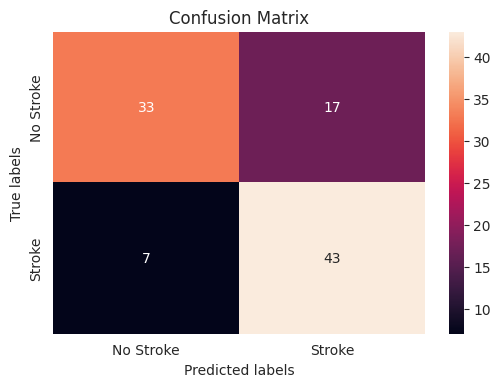

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# es importante recordar que estamos trabajando realizando un undersample con el dataset, se puede demostrar también que al igual que sucedió con árboles de decision,
# en Random Forest que mejora mucho el recall de esta manera
# por cuestiones de simplificar el trabajo práctico esto se obvia

undersample = RandomUnderSampler(sampling_strategy='majority')
inputs_under, targets_under = undersample.fit_resample(inputs_np, target)
train_inputs, test_inputs, train_target, test_target= train_test_split(inputs_under, targets_under, test_size= 0.2, random_state=42)

RFC = RandomForestClassifier(max_depth= 4)
RFC.fit(train_inputs,train_target)

pred_RFC = RFC.predict(test_inputs)

cm = confusion_matrix(test_target, pred_RFC)
print(cm)
print('El accuracy del modelo Random Forest es: ', accuracy_score(test_target, pred))
print("El recall es de", recall_score(test_target, pred))
# grafica de la matriz de confusion

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Stroke', 'Stroke']); ax.yaxis.set_ticklabels(['No Stroke', 'Stroke']);

In [ ]:
param_grid = {'max_depth': [4, 5, 6],
                'criterion': ['gini', 'entropy'],
                'min_samples_leaf': [2, 10, 20]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2)
grid.fit(train_inputs, train_target)
print(" Resultados de la Grid Search " )
print("\n El mejor estimador entre todos los hiperparámetros buscados:\n",grid.best_estimator_)
print("\n El mejor score entre todos los hiperparámetros buscados:\n",grid.best_score_)
print("\n Los mejores hiperparámetros entre todos los hiperparámetros buscados:\n",grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   0.1s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   0.1s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   0.1s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   0.1s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.1s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.1s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.1s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.1s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.1s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=20; total time=   0.1s
[CV] END ...criterion=gini, max_depth=4, min_sam

[[32 18]
 [ 6 44]]
El accuracy del modelo Random Forest determinado por la Grid Search es:  0.76
El recall del modelo Random Forest determinado por la Grid Search es de 0.88


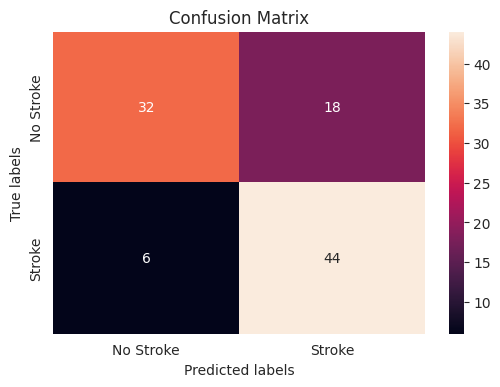

In [ ]:
RFC = RandomForestClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
RFC.fit(train_inputs,train_target)

pred_RFC = RFC.predict(test_inputs)

cm = confusion_matrix(test_target, pred_RFC)
print(cm)
print('El accuracy del modelo Random Forest determinado por la Grid Search es: ', accuracy_score(test_target, pred_RFC))
print("El recall del modelo Random Forest determinado por la Grid Search es de", recall_score(test_target, pred_RFC))
# grafica de la matriz de confusion
plt.rcParams["figure.dpi"] = 100
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Stroke', 'Stroke']); ax.yaxis.set_ticklabels(['No Stroke', 'Stroke']);

Podemos observar como del RECALL y la matriz de confusion anterior al combinar el undersample, la prueba de hiperparámetros de la búsqueda por grilla y Random Forest se consiguió un modelo mucho mas aceptable

A continuación podemos ver la importancia de cada feature en el Random Forest para realizar la clasificacion

In [ ]:
importances = list(RFC.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(inputs_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: age                  Importance: 0.46
Variable: ever_married         Importance: 0.13
Variable: avg_glucose_level    Importance: 0.13
Variable: bmi                  Importance: 0.09
Variable: work_type_Self-employed Importance: 0.05
Variable: hypertension         Importance: 0.03
Variable: work_type_children   Importance: 0.03
Variable: gender               Importance: 0.01
Variable: heart_disease        Importance: 0.01
Variable: smoking_status_formerly smoked Importance: 0.01
Variable: smoking_status_never smoked Importance: 0.01
Variable: smoking_status_smokes Importance: 0.01
Variable: work_type_Private    Importance: 0.01
Variable: Residence_type       Importance: 0.0
Variable: smoking_status_Unknown Importance: 0.0
Variable: work_type_Govt_job   Importance: 0.0
